# Create a Regression Model

## Instructions

In this lesson you were shown how to build a model using both Linear and Polynomial Regression. Using this knowledge, find a dataset or use one of Scikit-learn's built-in sets to build a fresh model. Explain in your notebook why you chose the technique you did, and demonstrate your model's accuracy. If it is not accurate, explain why.

## Rubric

| Criteria | Exemplary                                                    | Adequate                   | Needs Improvement               |
| -------- | ------------------------------------------------------------ | -------------------------- | ------------------------------- |
|          | presents a complete notebook with a well-documented solution | the solution is incomplete | the solution is flawed or buggy |

### Solutions

#### Importing Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


#### Loading Dataset

In [ ]:
# load

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Explore the Correlation

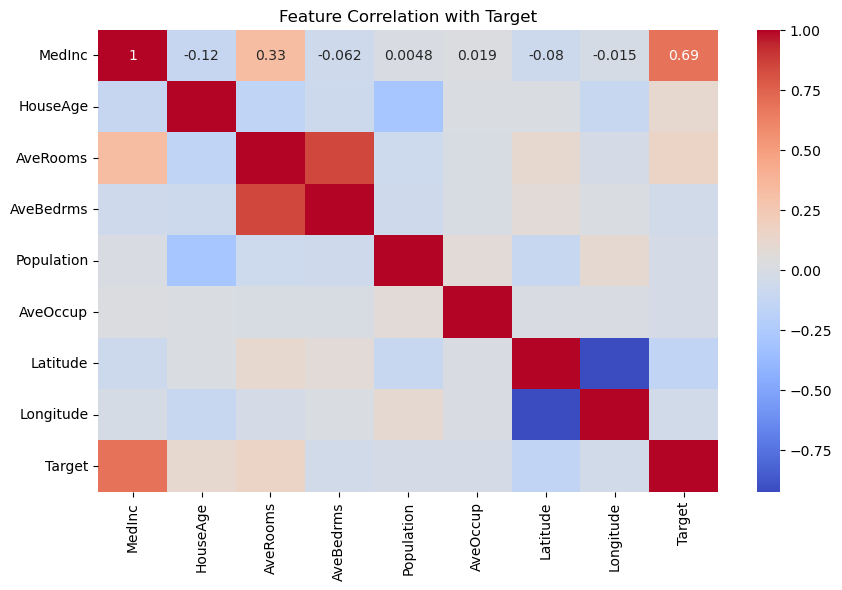

In [38]:
# Explore the Correlation
# This will help us understand the relationship between features and the target variable.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Target")
plt.show()


In [39]:
# Selecting Features and Target Variable
# X = df['MedInc']  # Median Income as the feature (as most correlated with target)
X = df['MedInc'] 
y = df['Target']



In [40]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.2, random_state=42)

#### Linear Regression Model

Mean Squared Error: 0.7091157771765548
R^2 Score: 0.45885918903846656


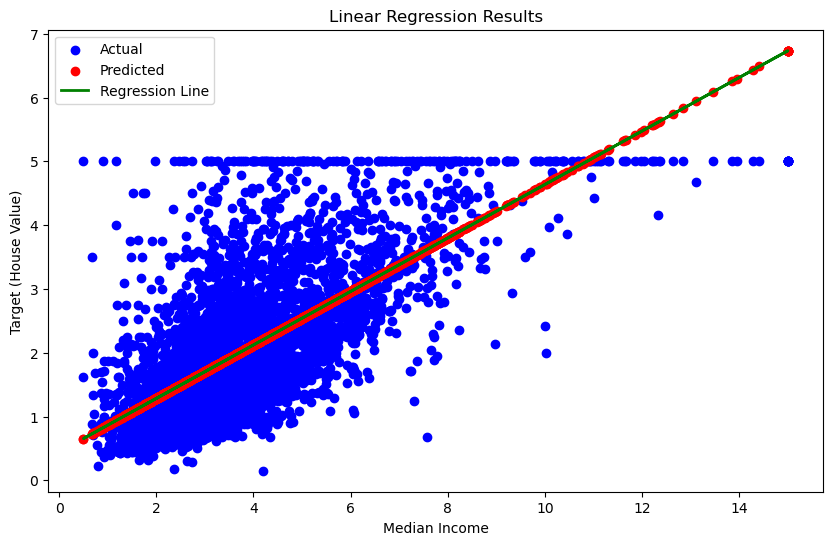

In [41]:
# linear Regression Model
mymodel = LinearRegression()
mymodel.fit(X_train, y_train)

# Predictions
y_pred = mymodel.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualizing the Results
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')
plt.title("Linear Regression Results")
plt.xlabel("Median Income")
plt.ylabel("Target (House Value)")
plt.legend()
plt.show()



#### Polynomial Regression Model

In [42]:
# Polynomial Regression Model
poly = PolynomialFeatures(degree=2)  # Change degree as needed
X_poly = poly.fit_transform(X_train)
mymodel_poly = LinearRegression()
mymodel_poly.fit(X_poly, y_train)

# Predictions for Polynomial Regression
X_test_poly = poly.transform(X_test)
y_pred_poly = mymodel_poly.predict(X_test_poly)


# Model Evaluation for Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Mean Squared Error: {mse_poly}")
print(f"Polynomial R^2 Score: {r2_poly}") 



Polynomial Mean Squared Error: 0.7032732680932144
Polynomial R^2 Score: 0.46331772769346224


### Random Forest

In [43]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()



In [44]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.2, random_state=42)
